# RGR Stock Price Forecasting Project

Author: Jack Wang

---

## Problem Statement

Stock prices are hard to predict because they are not only affected by the performance of the underlying companies but also the expectations from the general public. As known, the stock price of firearm companies are highly correlated to the public opinions toward gun ban. My model intends to predict the stock price of one of the largest firearm company in the states, RGR (Sturm, Ruger & Co., firearm company), by using its historical stock price and public opinions toward gun ban. 

## Executive Summary

The goal of my projcet is to build a **time series regression model** that predicts the stock price of RGR. The data I am using would be historical stock price from Yahoo Finance, twitter posts scraped from [twitter](https://twitter.com/), and also the news articles from major news website. I will perform NPL on the text data and time series modeling on the historical stock price data. The model will be evaluated using R^2 score.

## Content

This project consists of 5 Jupyter notebooks:
- ***Part-1-stock-price-data***
- Part-2-twitter-scraper
- Part-3-twitter-data-cleaning
- Part-4-reddit-data-scraper
- Part-5-reddit-data-cleaning
    - [Example](#Most-Frequent-Words-in-Title-and-Content)
- Part-6-Conclusion-and-Discussion


---


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import statsmodels.api as sm
# import itertools

# from datetime import datetime
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error
# from statsmodels.tsa.seasonal import seasonal_decompose
# from statsmodels.tsa.stattools import adfuller
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# from statsmodels.tsa.arima_model import ARIMA

# %matplotlib inline

# # This will allow us to avoid a FutureWarning when plotting.
# from pandas.plotting import register_matplotlib_converters
# register_matplotlib_converters()

plt.style.use('fivethirtyeight')

In [9]:
df_twitter = pd.read_csv("../data/twitter/twitter.csv")
df_reddit = pd.read_csv("../data/reddit/reddit.csv")
df_sec = pd.read_csv("../data/sec/sec.csv")
df_rgr = pd.read_csv("../data/stock_price/stock_price_2014_to_2019.csv")

In [12]:
df_rgr.iloc[250:251]

,Date,Open,High,Low,Close,Adj Close,Volume
250,2014-12-30,34.48,35.490002,34.279999,34.360001,30.920563,287800


In [3]:
df = pd.merge(df_1, df_2, how = 'outer')

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.shape

(1470, 7)

In [6]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [7]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,73.129997,74.000000,72.459999,73.750000,64.496201,373800
1,2014-01-03,73.709999,74.269997,73.220001,73.739998,64.487442,427200
2,2014-01-06,73.779999,75.750000,73.769997,74.019997,64.732330,318500
3,2014-01-07,75.750000,76.620003,74.459999,76.519997,66.918625,507000
4,2014-01-08,77.370003,79.269997,76.830002,78.980003,69.069954,665800


In [9]:
# Export combined data
df.to_csv("../data/stock_price/stock_price_2014_to_2019.csv", index=False)

### EDA on RGR historical stock price

In [10]:
df = df.set_index('Date')

In [11]:
# Create a function that plots time series data

def plot_series(df, cols=None, title='Title', xlab=None, ylab=None):
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=(18,9))
    
    # Iterate through each column name.
    for col in cols:
        plt.plot(df[col], label=col)
    plt.legend()
    
    # Generate title and labels.
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    # Enlarge tick marks.
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18);

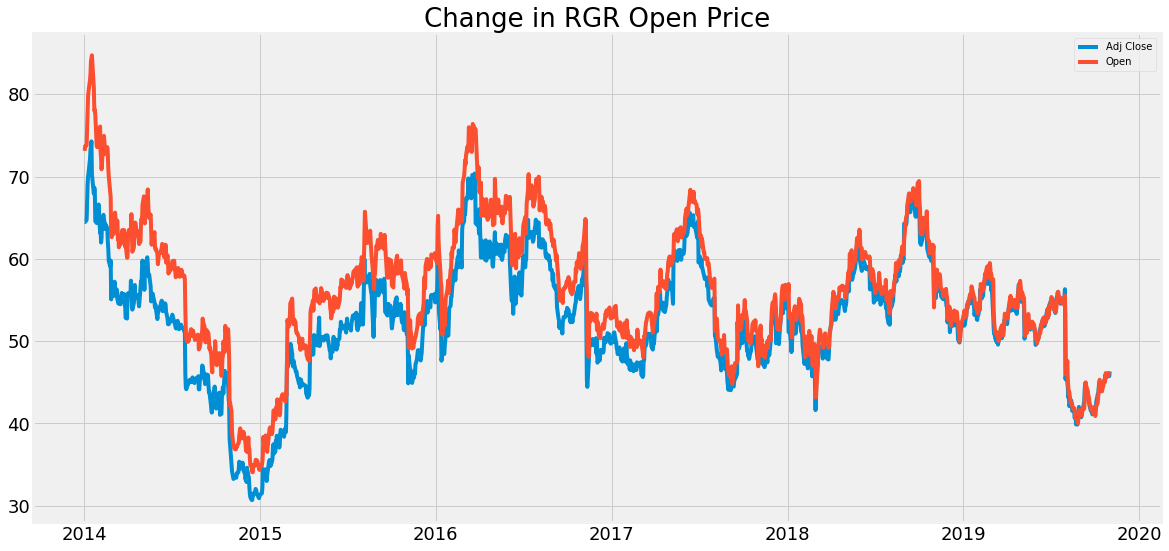

In [12]:
plot_series(df, ['Adj Close','Open'], title ='Change in RGR Open Price')

Adjusted closing price and open price follow a similar shape and trend. Adjusted close price takes into account for other aspects of the stock and is considered more accurate to the stock price value. However, since our final goal is to predict the money value of the stock, we will set `Open` price as our target.

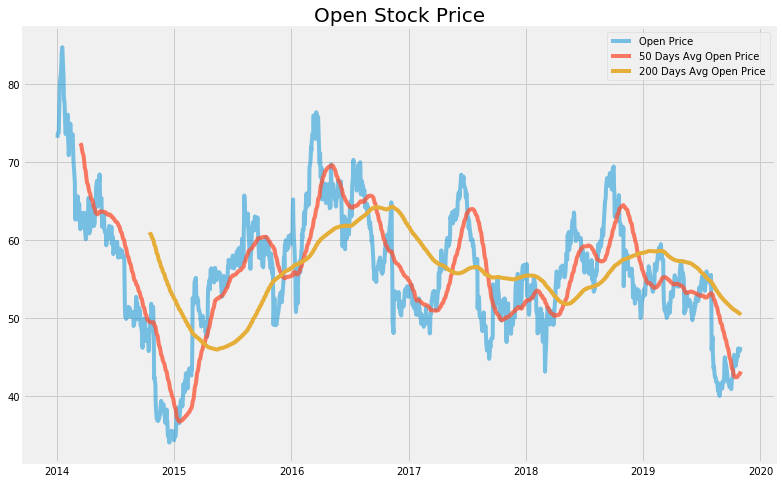

In [62]:
# Compare and plot the rolling prices
plt.figure(figsize=(12,8))
plt.plot(df['Open'],alpha = 0.5, label = "Open Price")
plt.plot(df['Open'].rolling(50).mean(), alpha = 0.75, label = "50 Days Avg Open Price")
plt.plot(df['Open'].rolling(200).mean(), label = "200 Days Avg Open Price")
plt.title("Open Stock Price", size = 20)
plt.legend();

***Golden Cross & Death Cross***
When the red line (50 days avg) goes above the yellow line (200 days avg), there is a strong indication for upward trend. It is so-called `Golden Cross`. On the other hand, when the red line goes below the yellow line, it is an indication for downward trend. It is called `Death Cross`. More information can be found [here](https://www.investopedia.com/ask/answers/121114/what-difference-between-golden-cross-and-death-cross-pattern.asp).

Text(0.5, 1.0, 'Open Price Percentage Difference')

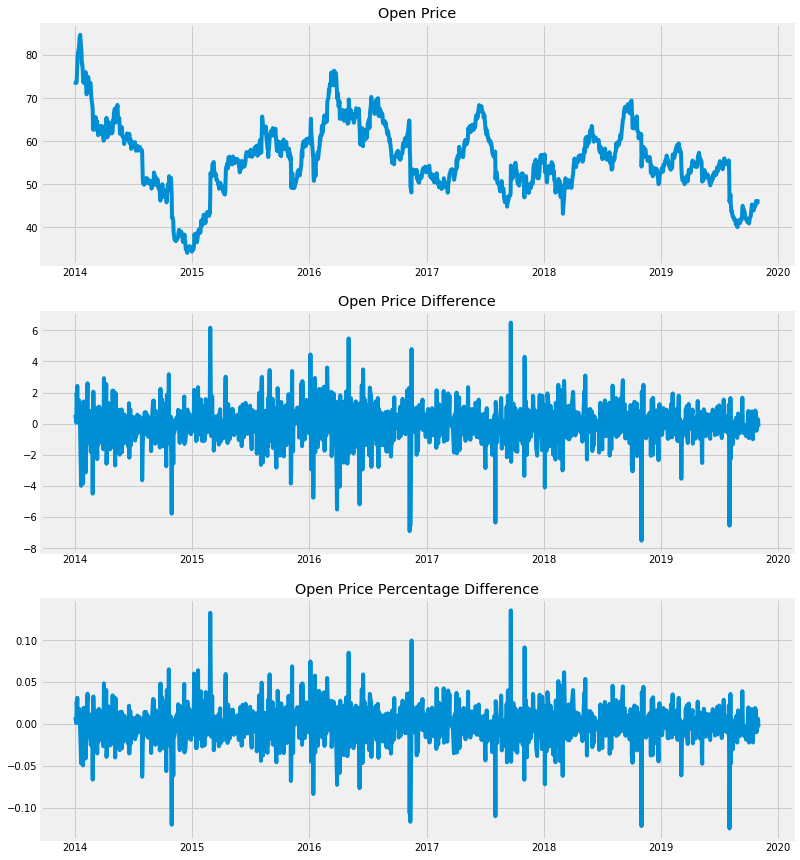

In [67]:
# Open price, open price with diffence, open price with percentage difference

fig, axes = plt.subplots(nrows = 3, figsize = (12, 15))
axes[0].plot(df['Open'])
axes[0].set_title('Open Price')
axes[1].plot(df['Open'].diff())
axes[1].set_title('Open Price Difference')
axes[2].plot(df['Open'].pct_change())
axes[2].set_title('Open Price Percentage Difference')

''

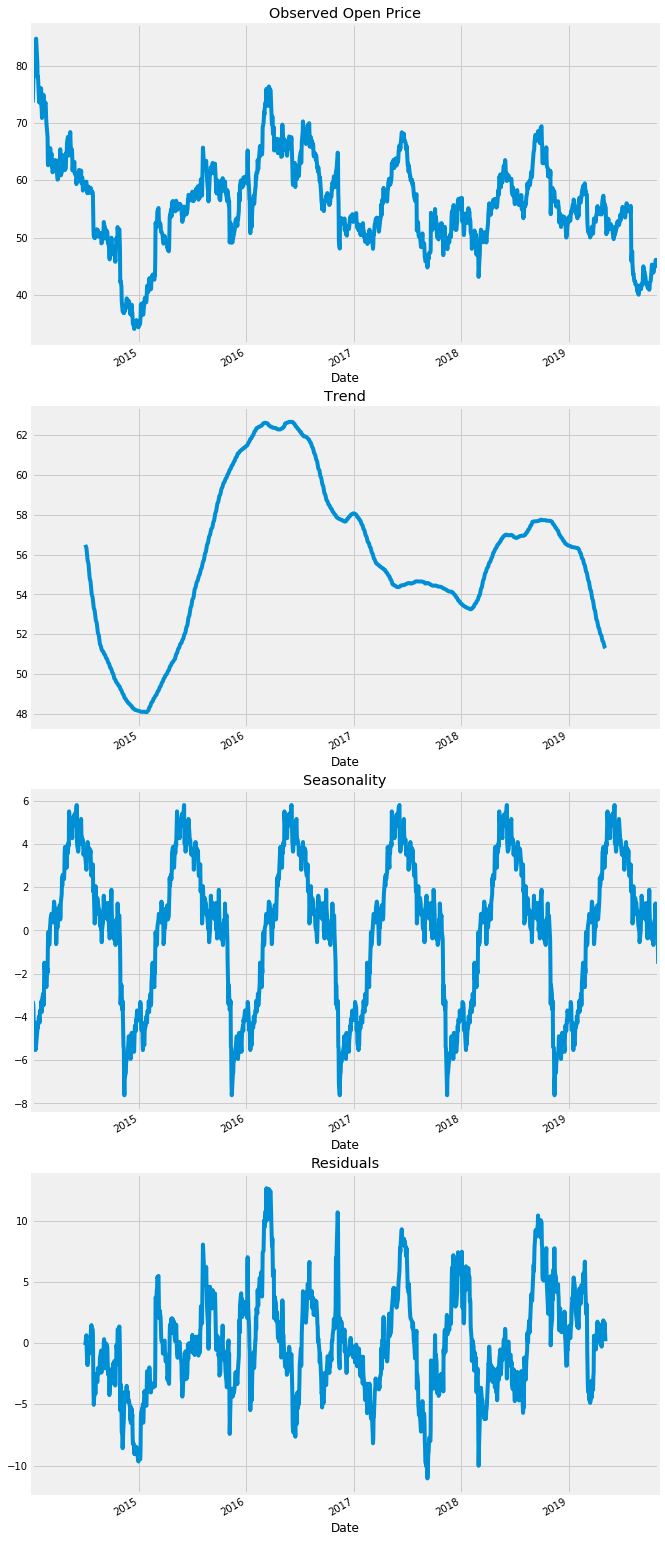

In [73]:
# Decompose time series into trend, seasonal, and residual components.
decomp = seasonal_decompose(df['Open'], freq = 252)
# Plot the decomposed time series.
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(10,30))
decomp.observed.plot(ax=ax1)
ax1.set_title('Observed Open Price')
decomp.trend.plot(ax=ax2)
ax2.set_title('Trend')
decomp.seasonal.plot(ax=ax3)
ax3.set_title('Seasonality')
decomp.resid.plot(ax=ax4)
ax4.set_title('Residuals')
;

### Fitting ARIMA models

In [16]:
train = df['2014':'2018']['Open']
test = df['2019']['Open']

In [17]:
# Code written by Joseph Nelson

def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

In [18]:
# Run ADF test on original (non-differenced!) data.

interpret_dftest(adfuller(train))

Test Statistic   -3.077299
p-value           0.028279
dtype: float64

Our data is stationary. No need to difference the data.

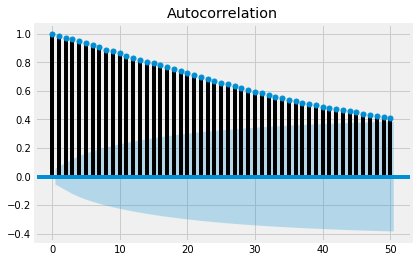

In [19]:
plot_acf(train, lags = 50);

Based on the above ACF, the q value for our ARIMA model should be 0.

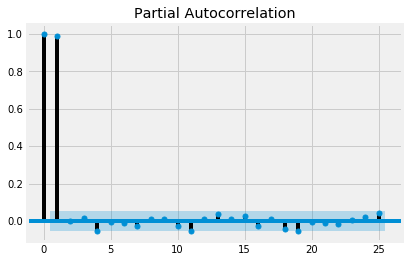

In [20]:
plot_pacf(train, lags = 25);

Based on above PACF, the p for our ARIMA model should be 1

In [21]:
# Instantiate model.

model = ARIMA(endog = train, order = (1, 0, 0))

# Fit model.
arima_1_0_0 = model.fit()

/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [24]:
# Generate predictions.
preds = model.predict(params=arima_1_0_0.params,
                      start=1259,
                      end=1259+210)

/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


**Plotting the predictions with test data**

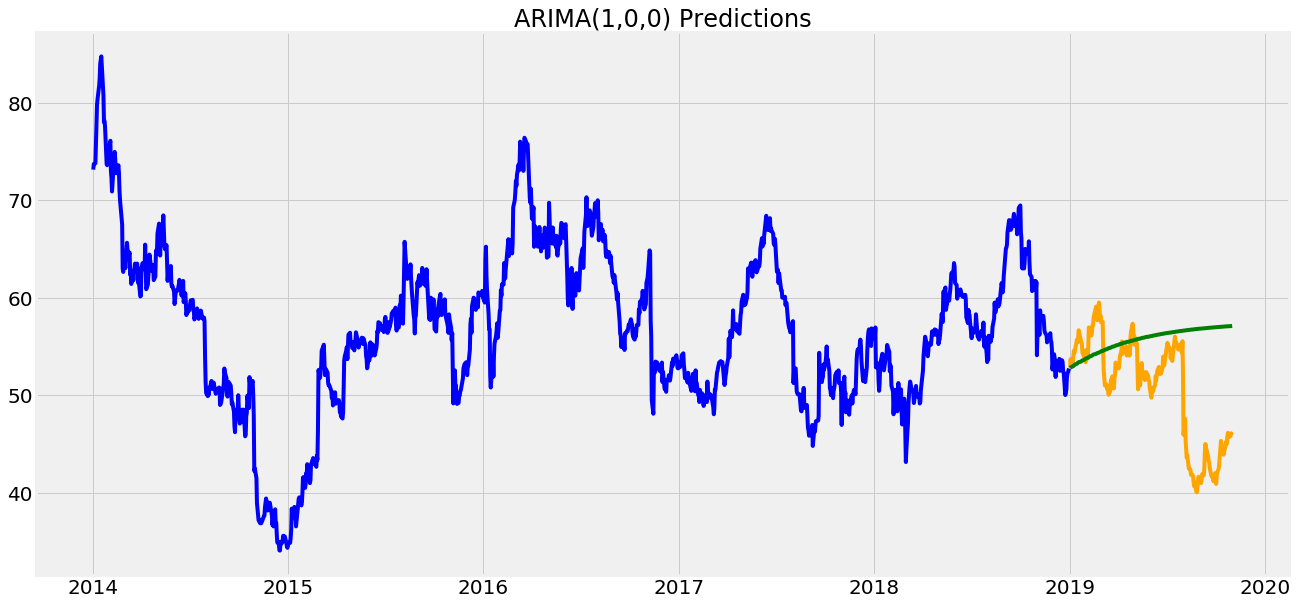

In [25]:
# Set figure size.
plt.figure(figsize=(20,10))

# Plot training data.
plt.plot(train.index, pd.DataFrame(train), color = 'blue')

# Plot testing data.
plt.plot(test.index, pd.DataFrame(test), color = 'orange')

# Plot predicted test values.
plt.plot(test.index, pd.DataFrame(preds), color = 'green')

# Set label.
plt.title(label = 'ARIMA(1,0,0) Predictions', fontsize=24)

# Resize tick marks.
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

In [74]:
# MSE
mean_squared_error(pd.DataFrame(test), preds)

1.642012575198851e+147

**GrideSearch over SARIMA**

In [29]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 5) for x in list(itertools.product(p, d, q))]

seasonal_pdq

[(0, 0, 0, 5),
 (0, 0, 1, 5),
 (0, 1, 0, 5),
 (0, 1, 1, 5),
 (1, 0, 0, 5),
 (1, 0, 1, 5),
 (1, 1, 0, 5),
 (1, 1, 1, 5)]

In [30]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{}5 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 0)x(0, 0, 0, 5)5 - AIC:13749.68507518579
ARIMA(0, 0, 0)x(0, 0, 1, 5)5 - AIC:12065.643805647349
ARIMA(0, 0, 0)x(0, 1, 0, 5)5 - AIC:6115.888808331418
ARIMA(0, 0, 0)x(0, 1, 1, 5)5 - AIC:6068.508726776787


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has n

ARIMA(0, 0, 0)x(1, 0, 0, 5)5 - AIC:6122.852767325333
ARIMA(0, 0, 0)x(1, 0, 1, 5)5 - AIC:6113.05987669467
ARIMA(0, 0, 0)x(1, 1, 0, 5)5 - AIC:6075.351088461305


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 0)x(1, 1, 1, 5)5 - AIC:6070.149395191888


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 1)x(0, 0, 0, 5)5 - AIC:12036.2723890899


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 5)5 - AIC:10617.667565298703
ARIMA(0, 0, 1)x(0, 1, 0, 5)5 - AIC:5368.1043964402215


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 1)x(0, 1, 1, 5)5 - AIC:5280.941472608052


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 5)5 - AIC:5383.257932782923


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.

ARIMA(0, 0, 1)x(1, 0, 1, 5)5 - AIC:5390.156948980141
ARIMA(0, 0, 1)x(1, 1, 0, 5)5 - AIC:5293.739660808681
ARIMA(0, 0, 1)x(1, 1, 1, 5)5 - AIC:5280.452173532452
ARIMA(0, 1, 0)x(0, 0, 0, 5)5 - AIC:4159.85973368492
ARIMA(0, 1, 0)x(0, 0, 1, 5)5 - AIC:4142.09738032909
ARIMA(0, 1, 0)x(0, 1, 0, 5)5 - AIC:5024.880749757116


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has n

ARIMA(0, 1, 0)x(0, 1, 1, 5)5 - AIC:4154.6345167927375
ARIMA(0, 1, 0)x(1, 0, 0, 5)5 - AIC:4144.674373861904


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 5)5 - AIC:4143.8160670447505
ARIMA(0, 1, 0)x(1, 1, 0, 5)5 - AIC:4605.345365585163


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 0)x(1, 1, 1, 5)5 - AIC:4153.617843623037
ARIMA(0, 1, 1)x(0, 0, 0, 5)5 - AIC:4159.313674650675
ARIMA(0, 1, 1)x(0, 0, 1, 5)5 - AIC:4140.195645491976


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 0, 5)5 - AIC:5022.944762654685


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 1, 5)5 - AIC:4144.689045801477
ARIMA(0, 1, 1)x(1, 0, 0, 5)5 - AIC:4146.2628731805025


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 5)5 - AIC:4141.941768043949
ARIMA(0, 1, 1)x(1, 1, 0, 5)5 - AIC:4607.162985222436


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 1, 5)5 - AIC:4143.3765624916205
ARIMA(1, 0, 0)x(0, 0, 0, 5)5 - AIC:4163.588592314695


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 5)5 - AIC:4145.405471903648
ARIMA(1, 0, 0)x(0, 1, 0, 5)5 - AIC:4888.689786235109


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 0)x(0, 1, 1, 5)5 - AIC:4150.132283524263
ARIMA(1, 0, 0)x(1, 0, 0, 5)5 - AIC:4145.483188066054


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 5)5 - AIC:4146.9862995508165
ARIMA(1, 0, 0)x(1, 1, 0, 5)5 - AIC:4523.721546288492


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 5)5 - AIC:4147.694062714837
ARIMA(1, 0, 1)x(0, 0, 0, 5)5 - AIC:4162.802914001577


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 5)5 - AIC:4144.397695510488
ARIMA(1, 0, 1)x(0, 1, 0, 5)5 - AIC:4877.1790102607265


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 1)x(0, 1, 1, 5)5 - AIC:4149.341952296247
ARIMA(1, 0, 1)x(1, 0, 0, 5)5 - AIC:4147.055639898474


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 5)5 - AIC:4146.042592147746
ARIMA(1, 0, 1)x(1, 1, 0, 5)5 - AIC:4522.506096457635


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 5)5 - AIC:4146.368019891903
ARIMA(1, 1, 0)x(0, 0, 0, 5)5 - AIC:4161.6392554479935
ARIMA(1, 1, 0)x(0, 0, 1, 5)5 - AIC:4143.705225701703
ARIMA(1, 1, 0)x(0, 1, 0, 5)5 - AIC:5026.4946818731405


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has n

ARIMA(1, 1, 0)x(0, 1, 1, 5)5 - AIC:4156.633828782906
ARIMA(1, 1, 0)x(1, 0, 0, 5)5 - AIC:4143.769863356019


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 5)5 - AIC:4145.415187475319
ARIMA(1, 1, 0)x(1, 1, 0, 5)5 - AIC:4604.465015375699


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 1, 5)5 - AIC:4155.292200752189
ARIMA(1, 1, 1)x(0, 0, 0, 5)5 - AIC:4160.379865065933


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 5)5 - AIC:4142.468472391885
ARIMA(1, 1, 1)x(0, 1, 0, 5)5 - AIC:5012.522595273425


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 1, 5)5 - AIC:4145.518568592806


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 0, 5)5 - AIC:4145.251940939752


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 5)5 - AIC:4144.156929563747


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 0, 5)5 - AIC:4604.791227763118


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 1, 5)5 - AIC:4145.7275401704155


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


The best SARIMAX model based on AIC score is with (1, 1, 1, 5)

In [32]:
mod = sm.tsa.statespace.SARIMAX(train,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 5),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4490      3.132     -0.143      0.886      -6.588       5.690
ma.L1          2.2096     15.270      0.145      0.885     -27.720      32.139
ar.S.L5       -0.0150      0.030     -0.506      0.613      -0.073       0.043
ma.S.L5       -1.0000     11.796     -0.085      0.932     -24.120      22.120
sigma2         0.3254      6.200      0.052      0.958     -11.827      12.477


/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


**As we can see, the p-value for all features are pretty high. We can conclude this model is performing poorly.**

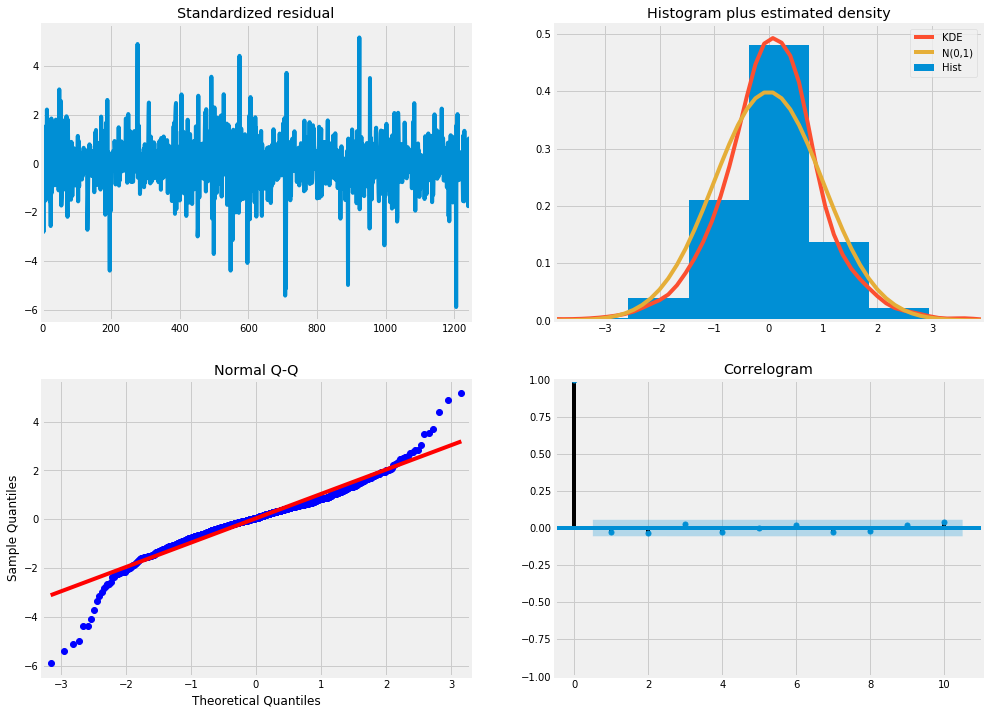

In [33]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

**The above plot shows that the residuals of our model are not normally distributed well. We should improve on our model. Our ultimate goal is to have uncorrelated residuals and normally distributed residuals.**

In [57]:
sarima_preds = results.predict(params=results.params,
                      start=1259,
                      end=1259+211)

/Users/jackwang/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


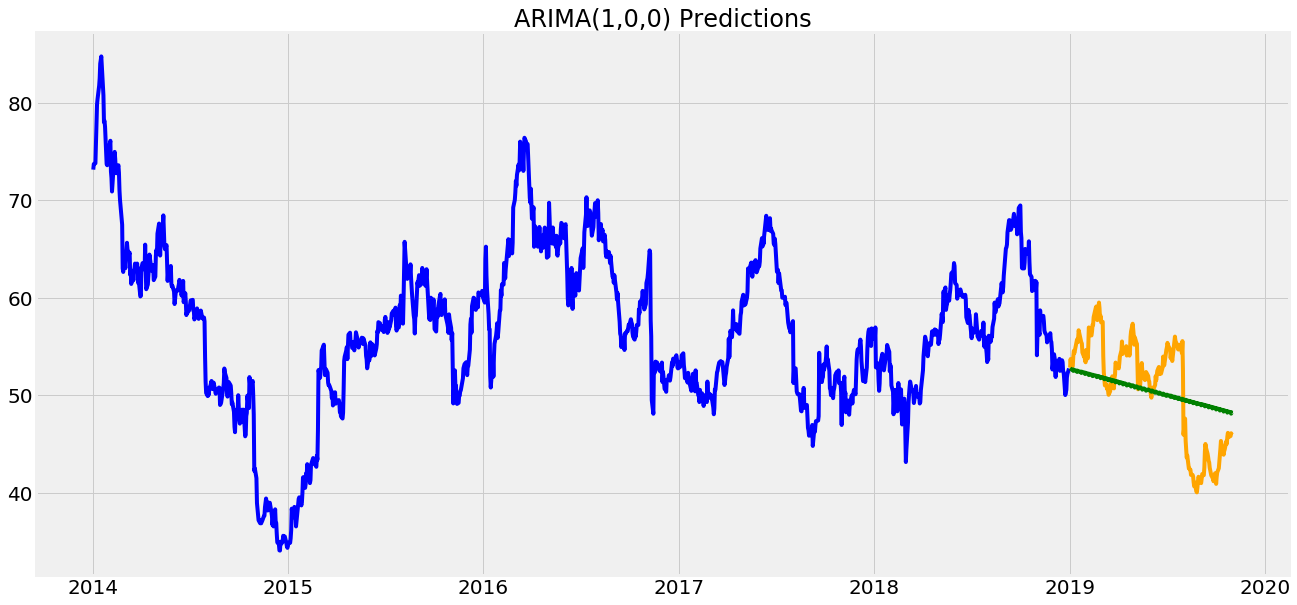

In [59]:
# Set figure size.
plt.figure(figsize=(20,10))

# Plot training data.
plt.plot(train.index, pd.DataFrame(train), color = 'blue')

# Plot testing data.
plt.plot(test.index, pd.DataFrame(test), color = 'orange')

# Plot predicted test values.
plt.plot(test.index, pd.DataFrame(sarima_preds), color = 'green')

# Set label.
plt.title(label = 'ARIMA(1,0,0) Predictions', fontsize=24)

# Resize tick marks.
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

In [61]:
# MSE
mean_squared_error(pd.DataFrame(test), sarima_preds)

19.92194665448408